In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk

https://realpython.com/python-gui-tkinter/#:~:text=Python%20has%20a%20lot%20of,Windows%2C%20macOS%2C%20and%20Linux.&text=Although%20Tkinter%20is%20considered%20the,framework%2C%20it's%20not%20without%20criticism.

In [2]:
def plot_series(x, y, xlen=10, ylen=6, xlabel="", ylabel="", grid=True, format="-", start=0, end=None):
    plt.figure(figsize=(xlen,ylen))
    plt.plot(x[start:end], y[start:end], format)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(grid)

In [3]:
cords = []
cords_dict = {}

for row in range(0,9):
    for col in range(0,9):
        cord = [row,col]
        square_cord = [row//3,col//3]
        square = ((row//3) * 3) + (col//3)
        cords.append(cord)
        cords_dict.update({len(cords_dict) : {'cord' : cord,
                                              'row' : row,
                                              'col' : col,
                                              'square_cord' : square_cord,
                                              'square' : square}})

# cords = list(cords_dict.keys())
        
print(cords)
print(cords_dict)

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8]]
{0: {'cord': [0, 0], 'row': 0, 'col': 0, 'square_cord': [0, 0], 'square': 0}, 1: {'cord': [0, 1], 'row': 0, 'col': 1, 'square_cord': [0, 0], 'square': 0}, 2: {'cord': [0, 2], 'row': 0, 'col': 2, 'square_cord': [0, 0], 'square': 0}, 3: {'cord': [0, 3], 'row': 0, 'col': 3, 'square_cord': [0, 1], 'square': 1}, 4: {'cord': [0, 4], 'row': 0, 'col': 4, 's

In [4]:
def get_distinct_cords_lists():
    
    global distinct_cords_lists
    
    distinct_cords_lists = []
    
    for n in range(0,9):
        row_cords = []
        col_cords = []
        square_cords = []
        for cord in cords:
            row, col = cord[0], cord[1]
            square = ((row//3) * 3) + (col//3)
            if row == n:
                row_cords.append(cord)
            if col == n:
                col_cords.append(cord)
            if square == n:
                square_cords.append(cord)
        distinct_cords_lists.append(row_cords)
        distinct_cords_lists.append(col_cords)
        distinct_cords_lists.append(square_cords)
#         print(f'   row {n}: {row_cords}')
#         print(f'   col {n}: {col_cords}')
#         print(f'square {n}: {square_cords}')
#         print('')
        
#     print(f'{len(distinct_cords_lists)} distinct lists')
#     print('')
        
#     for list in distinct_cords_lists:
#         print(list)
        
    return distinct_cords_lists

In [5]:
grid = [[4,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,9,0,0,0],
        [0,0,0,0,0,0,7,8,5],
        [0,0,7,0,4,8,0,5,0],
        [0,0,1,3,0,0,0,0,0],
        [0,0,6,0,7,0,0,0,0],
        [8,6,0,0,0,0,9,0,3],
        [7,0,0,0,0,5,0,6,2],
        [0,0,3,7,0,0,0,0,0]]

In [6]:
def get_lists(row, col):
    
    global row_list
    global col_list
    global square_list
    
    row_list = [num for num in grid[row] if num != 0]
    col_list = [x[col] for x in grid if x[col] != 0]
    trio = [row // 3, col // 3]
    square_list = []
    
    for row in range(0,9):
        for col in range(0,9):
            other_cell_trio = [row // 3, col // 3]
            if other_cell_trio == trio:
                if grid[row][col] != 0:
                    square_list.append(grid[row][col])
                
    return row_list, col_list, square_list

In [7]:
def find_values(cell_row, cell_col, skip_values=[]):
    
    global possible_values
    
    lists = get_lists(cell_row, cell_col)
    
    possible_values = []
    
    for value in range(1,10):
        if value not in row_list and value not in col_list and value not in square_list and value not in skip_values:
            possible_values.append(value)
    
    return possible_values

In [8]:
def show_grid(message=''):
    
    print(message)
    print()
    for r in grid:
        print(r)
#         print(f"{r[0]} | {r[1]} | {r[2]} | {r[3]} | {r[4]} | {r[5]} | {r[6]} | {r[7]} | {r[8]}")
#         print('-'*33)
    print()

In [9]:
def show_guesses():
    for guess in guesses:
        print(f'{guess} : {guesses[guess]}')
    print('')

In [10]:
def get_possibilities(mode):
    
    global poss_empty_cords_lol
    global one_poss_empty_cords_lol
    global zero_poss_empty_cords_lol

    poss_empty_cords_lol = []
    
    for cord in cords:
        row, col = cord[0], cord[1]
        if grid[row][col] == 0:
            find_values(row, col)
            poss_empty_cords_lol.append([cord, row, col, possible_values, len(possible_values)])

    poss_empty_cords_columns = ['cord','row','col','possible_values','possibilities']
    poss_empty_cords_df = pd.DataFrame(poss_empty_cords_lol, columns=poss_empty_cords_columns)
    
    if mode == 'quick':
        sort_by = ['possibilities','row','col']
    elif mode == 'relentless':
        sort_by = ['row','col']
    
    poss_empty_cords_df.sort_values(by=sort_by, axis=0, ascending=True, inplace=True)
    
    poss_empty_cords_df.reset_index(drop=True, inplace=True)
    
    poss_empty_cords_lol = poss_empty_cords_df.values.tolist()
    one_poss_empty_cords_lol = poss_empty_cords_df[poss_empty_cords_df['possibilities'] == 1].values.tolist()
    zero_poss_empty_cords_lol = poss_empty_cords_df[poss_empty_cords_df['possibilities'] == 0].values.tolist()
    
    return poss_empty_cords_lol, one_poss_empty_cords_lol, zero_poss_empty_cords_lol

In [11]:
def assess_dupe_error():
    
    global dupe_error
    
    dupe_error = False
    
    lists = []
    
    for cord in cords:
        row, col = cord[0], cord[1]
        get_lists(row, col)
        for list in [row_list, col_list, square_list]:
            if len(list) != len(set(list)):
                dupe_error = True
                
    return dupe_error

In [12]:
def assess_homeless_error():
    
    global homeless_error
    
    homeless_error = False
    
    # use get_distinct_cords_lists() to get current values and remaining possibilities for each row, col, and square list 
    # if any number 1-9 is missing from those values and possibilities then flag homeless_error
        
    get_distinct_cords_lists()
    
    for cords_list in distinct_cords_lists:
        list_current_and_poss_values = []
        for cord in cords_list:
            row, col = cord[0], cord[1]
            value = grid[row][col]
            if value != 0:
                list_current_and_poss_values.append(value)
            else:
                find_values(row, col)
                for poss_value in possible_values:
                    if poss_value not in list_current_and_poss_values:
                        list_current_and_poss_values.append(poss_value)
        
        list_current_and_poss_values = sorted(list_current_and_poss_values)
        ideal_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        if list_current_and_poss_values != ideal_list:
            homeless_error = True
            break
        
#         print(f'cords_list: {cords_list}')
#         print(f'list_current_and_poss_values: {list_current_and_poss_values}')
#         print('')
        
    return homeless_error

In [13]:
assess_homeless_error()

False

In [14]:
def get_most_recent_guess():      
    
    global most_recent_guess_index
    global most_recent_guess
    
    global cord
    global last_guess
    global all_poss
    global failed_guesses
    
    guess_list = []
    
    for guess in guesses:
#         print(f'{guess} : {guesses[guess]}')
        guess_list.append(guess)
    
    if len(guesses) > 1:
        most_recent_guess_index = max(guess_list)
    else:
        most_recent_guess_index = 0
        
    most_recent_guess = guesses[most_recent_guess_index]
            
    cord = most_recent_guess['cord']
    last_guess = most_recent_guess['guess']
    all_poss = most_recent_guess['all_poss']
    failed_guesses = most_recent_guess['failed_guesses']
        
    return most_recent_guess_index, most_recent_guess, cord, last_guess, all_poss, failed_guesses

In [15]:
grids = {

    'easy' : [[0,0,0,2,6,0,7,0,1],
              [6,8,0,0,7,0,0,9,0],
              [1,9,0,0,0,4,5,0,0],
              [8,2,0,1,0,0,0,4,0],
              [0,0,4,6,0,2,9,0,0],
              [0,5,0,0,0,3,0,2,8],
              [0,0,9,3,0,0,0,7,4],
              [0,4,0,0,5,0,0,3,6],
              [7,0,3,0,1,8,0,0,0]],

    'hard' : [[4,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,9,0,0,0],
              [0,0,0,0,0,0,7,8,5],
              [0,0,7,0,4,8,0,5,0],
              [0,0,1,3,0,0,0,0,0],
              [0,0,6,0,7,0,0,0,0],
              [8,6,0,0,0,0,9,0,3],
              [7,0,0,0,0,5,0,6,2],
              [0,0,3,7,0,0,0,0,0]],

    'blank' : [[0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0]]
    
}

grid = grids['easy']

show_grid(f'start')

###################################################################################

window = tk.Tk()

# frame = tk.Frame(master=window, width=450, height=400, bg="black")
# frame.pack()

for cord in cords:
    row, col = cord[0], cord[1]
    x, y = (col + 1) * 35, (row + 1) * 35
    value = grid[row][col]
    if value != 0:
        print_value = value
    else:
        print_value = ""
#     label1 = tk.Label(master=frame, text=print_value, fg="white", bg="black")
#     label1.place(x=x, y=y)
    
    frame = tk.Frame(master=window, relief=tk.RAISED, borderwidth=1, bg="black")
    frame.grid(row=y, column=x)
    label = tk.Label(master=frame, text=print_value, width=4, height=2)
    label.pack()
    
#     if cord == [1,1]:
#         frame = tk.Frame(master=window, relief=tk.RAISED, borderwidth=5, bg="black")
#         frame.grid(row=y, column=x)
#         label = tk.Label(master=frame, text=print_value, width=12, height=6)
#         label.pack()  

# content = [row for row in grid]
# greeting = tk.Label(text=content,
#                     fg="white",
#                     bg="black",
#                     width=50,
#                     height=20)
# greeting.pack()

def handle_keypress(event):
    """Print the character associated to the key pressed"""
    print(event.char)
    
def next_guess(event):
    print("The next guess is...")

# Bind keypress event to handle_keypress()
# window.bind("<Key>", handle_keypress)
window.bind("<Key>", next_guess)
window.mainloop()

# while True:
#     tk.update_idletasks()
#     tk.update()

###################################################################################

loops_and_guesses = []

already_filled = 0

for row in grid:
    for x in row:
        if x > 0:
            already_filled = already_filled + 1

mode = 'quick'
# mode = 'relentless'

get_possibilities(mode)

guesses = {}
loops = 0
loops_limit = 1000000

while len(poss_empty_cords_lol) > 0 and loops < loops_limit:
#     print('')
#     print('New loop! ##########################################################################')
#     print('')
    
    assess_dupe_error()
    assess_homeless_error()
    # 1. Undo incorrect previous guess
    
    if len(zero_poss_empty_cords_lol) > 0 or dupe_error or homeless_error:
        
        #######################################################################################################
#         if dupe_error:
#             print('A row/column/square has a repeated value!')
#         elif homeless_error:
#             print('A row/column/square is missing some values/possibilities!')
#         else:
#             print('Some cells have no possibilities!')
        
#         print(f'{len(guesses)} guesses have been made so far')
#         print('')
        #######################################################################################################
        
        get_most_recent_guess()
        
        failed_guesses.append(last_guess)
        
#         print(f'most recent guess failed:   {most_recent_guess_index} : {most_recent_guess}')
#         print('')
                
        row, col = cord[0], cord[1]
        grid[row][col] = 0

#         print(f'{cord} reset to 0')
#         print('')
        
        undos = 0
        
        while len(all_poss) == len(failed_guesses) and undos < 100:

            del guesses[most_recent_guess_index]
            
            get_most_recent_guess()

            failed_guesses.append(last_guess)

#             print(f'most recent guess failed:   {most_recent_guess_index} : {most_recent_guess}')
#             print('')
                
            row, col = cord[0], cord[1]
            grid[row][col] = 0
                
#             print(f'{cord} reset to 0')
#             print('')
            
            undos = undos + 1
            
        for poss in all_poss:
            if poss not in failed_guesses:
                guess = poss
                break
                
        row, col = cord[0], cord[1]
        grid[row][col] = guess
        most_recent_guess['guess'] = guess
        
#         print(f'new guess at last position:   {most_recent_guess_index} : {most_recent_guess}')
#         print('')
    
    # 2. Make a guess at the first cell with the least possibilities
    
    else:
#         print(f'cord to guess: {poss_empty_cords_lol[0]}')
#         print('')
        
        guess_cord = poss_empty_cords_lol[0]
        all_poss = guess_cord[3]
        guess = all_poss[0]
        cord = guess_cord[0]
        row, col = cord[0], cord[1]
        grid[row][col] = guess
        index = len(guesses)
        guesses.update({
            index: {
                'cord'           : cord,
                'all_poss'       : all_poss,
                'guess'          : guess,
                'failed_guesses' : []
            }
        })
        
#     show_guesses()
#     show_grid(f'{guess} guessed at {cord}')

    get_possibilities(mode)
    
    loops = loops + 1
    no_guesses = len(guesses)
    
    if loops % 10000 == 0:
        print(f'Loop {loops} has {no_guesses} guesses')
    
    loops_and_guesses.append({
        'Loop'               : loops,
        'Filled Cells'       : no_guesses,
        'Total Filled Cells' : no_guesses + already_filled,
    })
    
print(f'Completed {no_guesses} guesses in {loops} loops :)')
print('')
show_grid('end')

start

[0, 0, 0, 2, 6, 0, 7, 0, 1]
[6, 8, 0, 0, 7, 0, 0, 9, 0]
[1, 9, 0, 0, 0, 4, 5, 0, 0]
[8, 2, 0, 1, 0, 0, 0, 4, 0]
[0, 0, 4, 6, 0, 2, 9, 0, 0]
[0, 5, 0, 0, 0, 3, 0, 2, 8]
[0, 0, 9, 3, 0, 0, 0, 7, 4]
[0, 4, 0, 0, 5, 0, 0, 3, 6]
[7, 0, 3, 0, 1, 8, 0, 0, 0]

Completed 45 guesses in 45 loops :)

end

[4, 3, 5, 2, 6, 9, 7, 8, 1]
[6, 8, 2, 5, 7, 1, 4, 9, 3]
[1, 9, 7, 8, 3, 4, 5, 6, 2]
[8, 2, 6, 1, 9, 5, 3, 4, 7]
[3, 7, 4, 6, 8, 2, 9, 1, 5]
[9, 5, 1, 7, 4, 3, 6, 2, 8]
[5, 1, 9, 3, 2, 6, 8, 7, 4]
[2, 4, 8, 9, 5, 7, 1, 3, 6]
[7, 6, 3, 4, 1, 8, 2, 5, 9]



In [16]:
# because of a bad guess made earlier, two neighbouring cells may share the same single possibility
# these will both then be eliminated until the mistake is apparent from a cell having no possibilities
# to prevent this, get_possibilities should be run after every elimination in the for loop, and break out if some have 0 poss
# this would allow the while loop to run again straight away, discover the 0 poss cells and undo last guess and following elims

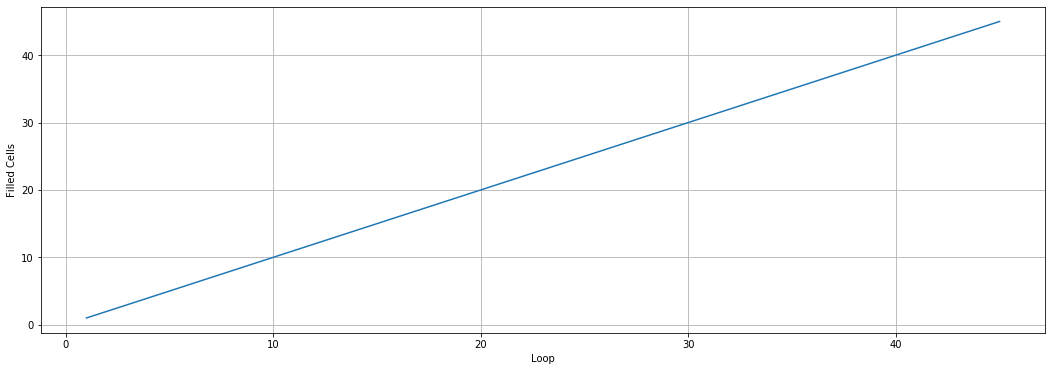

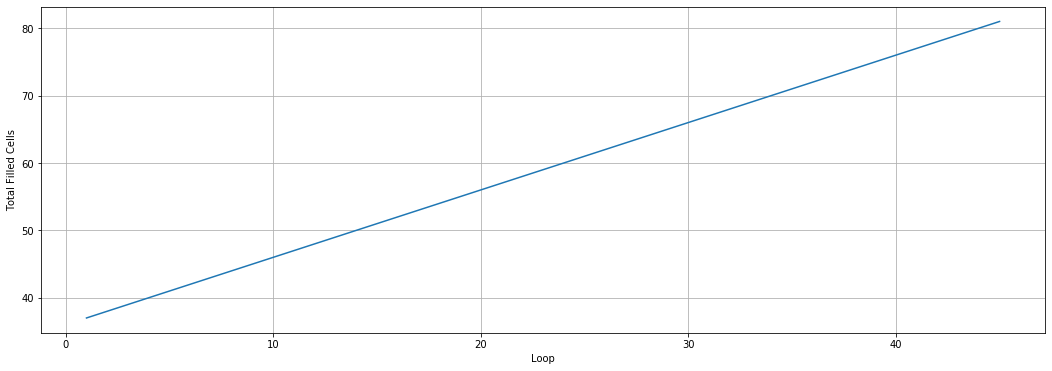

In [17]:
loops_and_guesses_df = pd.DataFrame(loops_and_guesses)

x_name = 'Loop'
x = loops_and_guesses_df[x_name]

for y_name in ['Filled Cells','Total Filled Cells']:
    y = loops_and_guesses_df[y_name]
    plot_series(x, y, 18, 6, x_name, y_name, grid=True)

In [18]:
for guess in guesses:
    print(f'{guess} : {guesses[guess]}')

0 : {'cord': [0, 1], 'all_poss': [3], 'guess': 3, 'failed_guesses': []}
1 : {'cord': [0, 2], 'all_poss': [5], 'guess': 5, 'failed_guesses': []}
2 : {'cord': [0, 0], 'all_poss': [4], 'guess': 4, 'failed_guesses': []}
3 : {'cord': [0, 5], 'all_poss': [9], 'guess': 9, 'failed_guesses': []}
4 : {'cord': [0, 7], 'all_poss': [8], 'guess': 8, 'failed_guesses': []}
5 : {'cord': [1, 2], 'all_poss': [2], 'guess': 2, 'failed_guesses': []}
6 : {'cord': [1, 3], 'all_poss': [5], 'guess': 5, 'failed_guesses': []}
7 : {'cord': [1, 5], 'all_poss': [1], 'guess': 1, 'failed_guesses': []}
8 : {'cord': [1, 8], 'all_poss': [3], 'guess': 3, 'failed_guesses': []}
9 : {'cord': [1, 6], 'all_poss': [4], 'guess': 4, 'failed_guesses': []}
10 : {'cord': [2, 2], 'all_poss': [7], 'guess': 7, 'failed_guesses': []}
11 : {'cord': [2, 3], 'all_poss': [8], 'guess': 8, 'failed_guesses': []}
12 : {'cord': [2, 4], 'all_poss': [3], 'guess': 3, 'failed_guesses': []}
13 : {'cord': [2, 7], 'all_poss': [6], 'guess': 6, 'failed_gu

search: elims to undo

in one case, only 3/5 elims cords are undone


the for loop works but ignores cords [0,1] and [8,1] but works for other 3

A row/column/square has a repeated value

3 guesses have been made so far

5 elims to undo: [[2, 1], [0, 1], [3, 1], [8, 1], [8, 0]]

[2, 1] will be removed

[2, 1] removed

[3, 1] will be removed

[3, 1] removed

[8, 0] will be removed

[8, 0] removed

attributed elims undone:   2 : {'cord': [1, 1], 'all_poss': [3, 7], 'guess': 7, 'failed_guesses': [3, 7], 'elims': [[0, 1], [8, 1]]}

elims reverted to 0

in another case, only 1/2 is undone